# Simple_Linear Regression

In [1]:
# Importing Required Package

import pandas as pd

import numpy as np

In [2]:
ground_cricket_data = {"Chirps": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}

df = pd.DataFrame(ground_cricket_data)   # Reading the Dataset

df.head()

,Chirps,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [3]:
df.shape

(15, 2)

# Preprocessing The Data

In [4]:
df.isnull().sum()   # Checking for null values

Chirps                0
Ground_Temperature    0
dtype: int64

In [5]:
df.describe()

,Chirps,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
# Checking for Outliers

iqr = df.Chirps.quantile(0.75) - df.Chirps.quantile(0.25)   #(q3 - q1)

upper_threshold = df.Chirps.quantile(0.75) + (1.5 * iqr)    #(q3 - 1.5*iqr)

lower_threshold = df.Chirps.quantile(0.25) - (1.5 * iqr)    #(q1 - 1.5*iqr))

upper_threshold , lower_threshold

(19.699999999999996, 12.9)

In [7]:
df.Chirps = df.Chirps.clip(12.9 , 19.69)   # Treating Outliers

In [8]:
# deleting the duplicates

df = df.drop_duplicates()

df.shape

(15, 2)

In [9]:
df.dtypes

Chirps                float64
Ground_Temperature    float64
dtype: object

# EDA

#  Is there any releation between fts and target - Yes
#  Is there any Linear releation between fts and target - Yes
#  NO Transformation is required

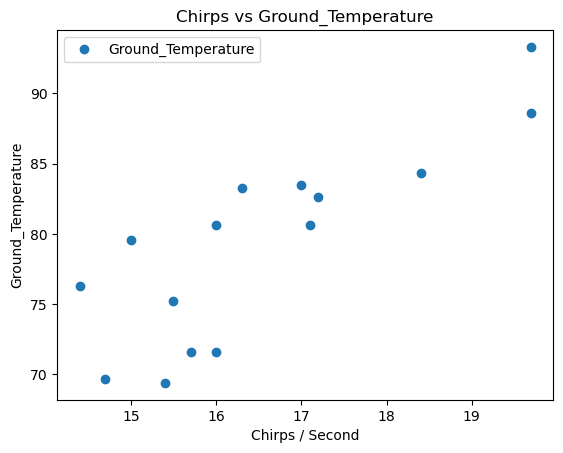

In [10]:
import matplotlib.pyplot as plt   # importing required package

df.plot(x = 'Chirps' , y = 'Ground_Temperature' , style = 'o')

plt.title('Chirps vs Ground_Temperature')

plt.xlabel('Chirps / Second')

plt.ylabel('Ground_Temperature')

plt.show()

In [11]:
df.corr() # it has high linear releation btw fts and target variable

,Chirps,Ground_Temperature
Chirps,1.000000,0.834229
Ground_Temperature,0.834229,1.000000


In [12]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

# There is no categorical data so, no need to encode the data

In [13]:
# Train and Split the data

X = df.loc[ : ,['Chirps']].values  # select all rows and select chirps column as my feature

y = df.loc[ : , 'Ground_Temperature'].values  # target variable as array

from sklearn.model_selection import train_test_split  # import required package to train and split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
X_train.shape , X_test.shape

((10, 1), (5, 1))

# Normalising / Scaling The Dataset

In [15]:
from sklearn.preprocessing import StandardScaler  # importing required package

scaler = StandardScaler()  # initializing the scaler function

scaler.fit(X_train) # find the values of muu and sigma

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  # only transform the X_test and don't fit the test data

X_train , X_test

(array([[-0.01678599],
        [ 0.9903735 ],
        [ 1.997533  ],
        [-0.26857586],
        [-1.35966532],
        [-0.85608557],
        [-0.52036574],
        [-1.10787544],
        [ 0.90644354],
        [ 0.23500388]]),
 array([[ 0.82251359],
        [-0.43643578],
        [ 3.08022945],
        [-0.01678599],
        [ 3.08022945]]))

# Modeling the data

In [16]:
# model for simple linear regression 

# y(Ground_Temperature) = (m * Chirps) + c

In [17]:
from sklearn.linear_model import LinearRegression  # importing the required package

regressor = LinearRegression()  # y = (m * x) + c

regressor.fit(X_train , y_train)  # learning happens like gradient descent and get final values of m and c


LinearRegression()

In [18]:
regressor.intercept_  # C

77.8

In [19]:
regressor.coef_  # slpoe - m

array([3.70298974])

In [30]:
regressor.predict([[19]])

array([148.15680501])

In [21]:
y_pred = regressor.predict(X_test)

y_pred

array([80.84575937, 76.18388278, 89.20605804, 77.73784165, 89.20605804])

In [24]:
df_1 = pd.DataFrame({'Actual': y_test , 'Predicted' : y_pred})

df_1

,Actual,Predicted
0,83.5,80.845759
1,75.2,76.183883
2,93.3,89.206058
3,71.6,77.737842
4,88.6,89.206058


In [26]:
regressor.predict([[12]])

array([122.23587685])

# Evaluation Metric

In [27]:
from sklearn import metrics  # importing the required package

print('R2_Score:' , metrics.r2_score(y_test , y_pred))

R2_Score: 0.8078689580268621


In [29]:
regressor.score(X_test , y_test)

0.8078689580268621

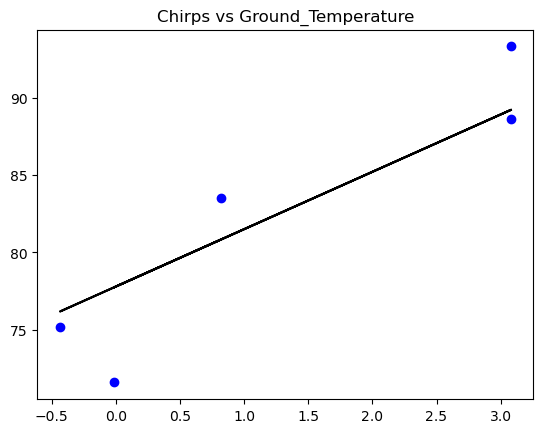

In [32]:
y_pred = regressor.predict(X_test)

plt.title('Chirps vs Ground_Temperature')

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')
  
plt.show()

# Loss Function
# Hence there is less outliers we are using MSE

In [33]:
from sklearn.metrics import mean_squared_error  # importing the required package

MSE = mean_squared_error(y_true = y_test , y_pred = y_pred)

In [34]:
MSE

12.562757162872387